In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
df = pd.read_csv("C:/Users/Ramesh/OneDrive/Desktop/Exposys Data labs/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Data Preprocessing steps
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.value_counts()==0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          False
             67       76             0              0        45.3  0.194                     46   0          False
5            103      108            37             0        39.2  0.305                     65   0          False
             104      74             0              0        28.8  0.153                     48   0          False
             105      72             29             325      36.9  0.159                     28   0          False
                                                                                                             ...  
2            84       50             23             76       30.4  0.968                     21   0          False
             85       65             0              0        39.6  0.930                 

In [5]:
#Visualizing missing values or null values
import missingno as mno

<AxesSubplot:>

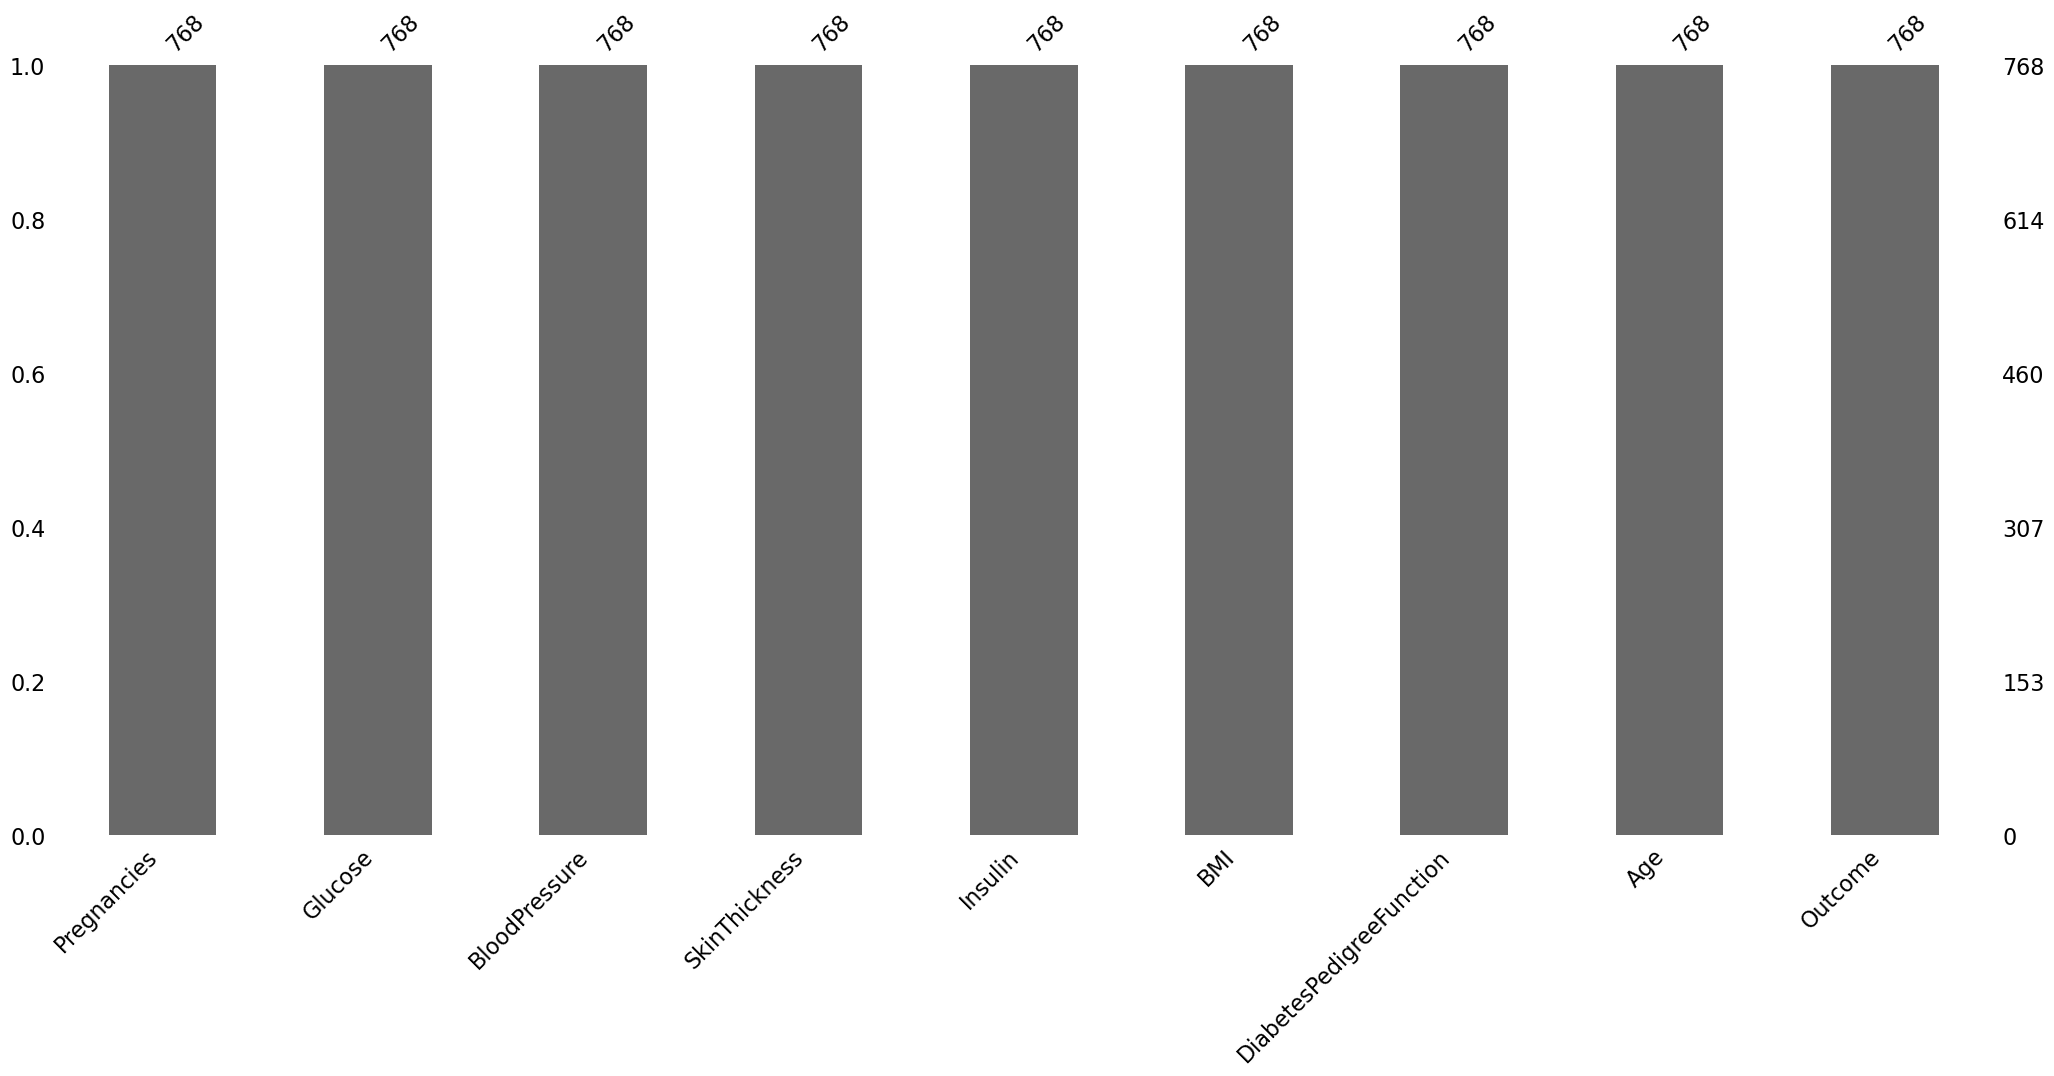

In [6]:
mno.bar(df)

<AxesSubplot:>

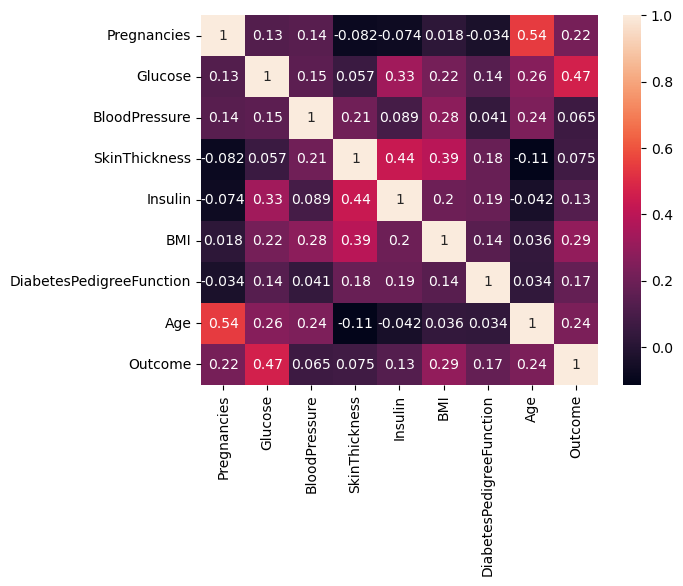

In [7]:
#Correlation heatmap
sns.heatmap(df.corr(), annot= True)

In [8]:
#There are many values as "0" let's replace them with "NaN"
df2 = df.copy(deep = True)
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [10]:
#Now checking null values
df2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
#Replacing null values
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace = True)
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].median(), inplace = True)

In [12]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

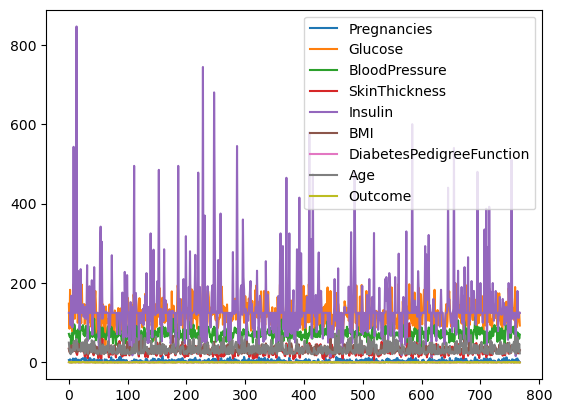

In [13]:
#Simple plot between the features
df2.plot()

<AxesSubplot:>

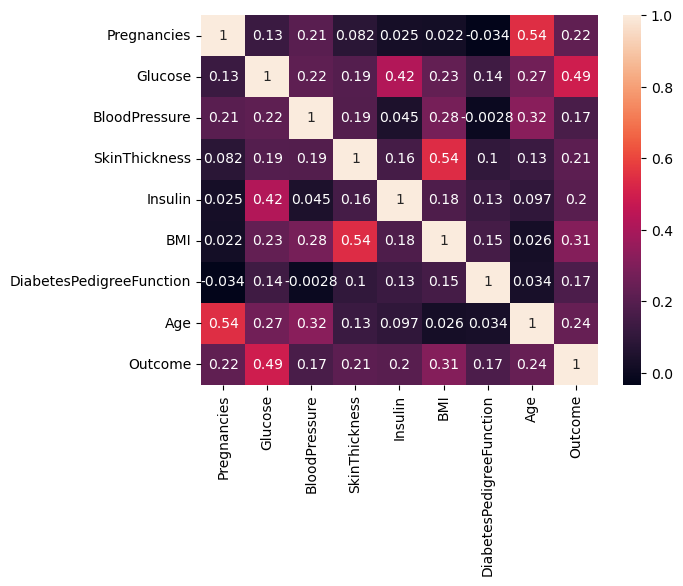

In [14]:
#Correlation of the dataset after removing null values
sns.heatmap(df2.corr(), annot = True)

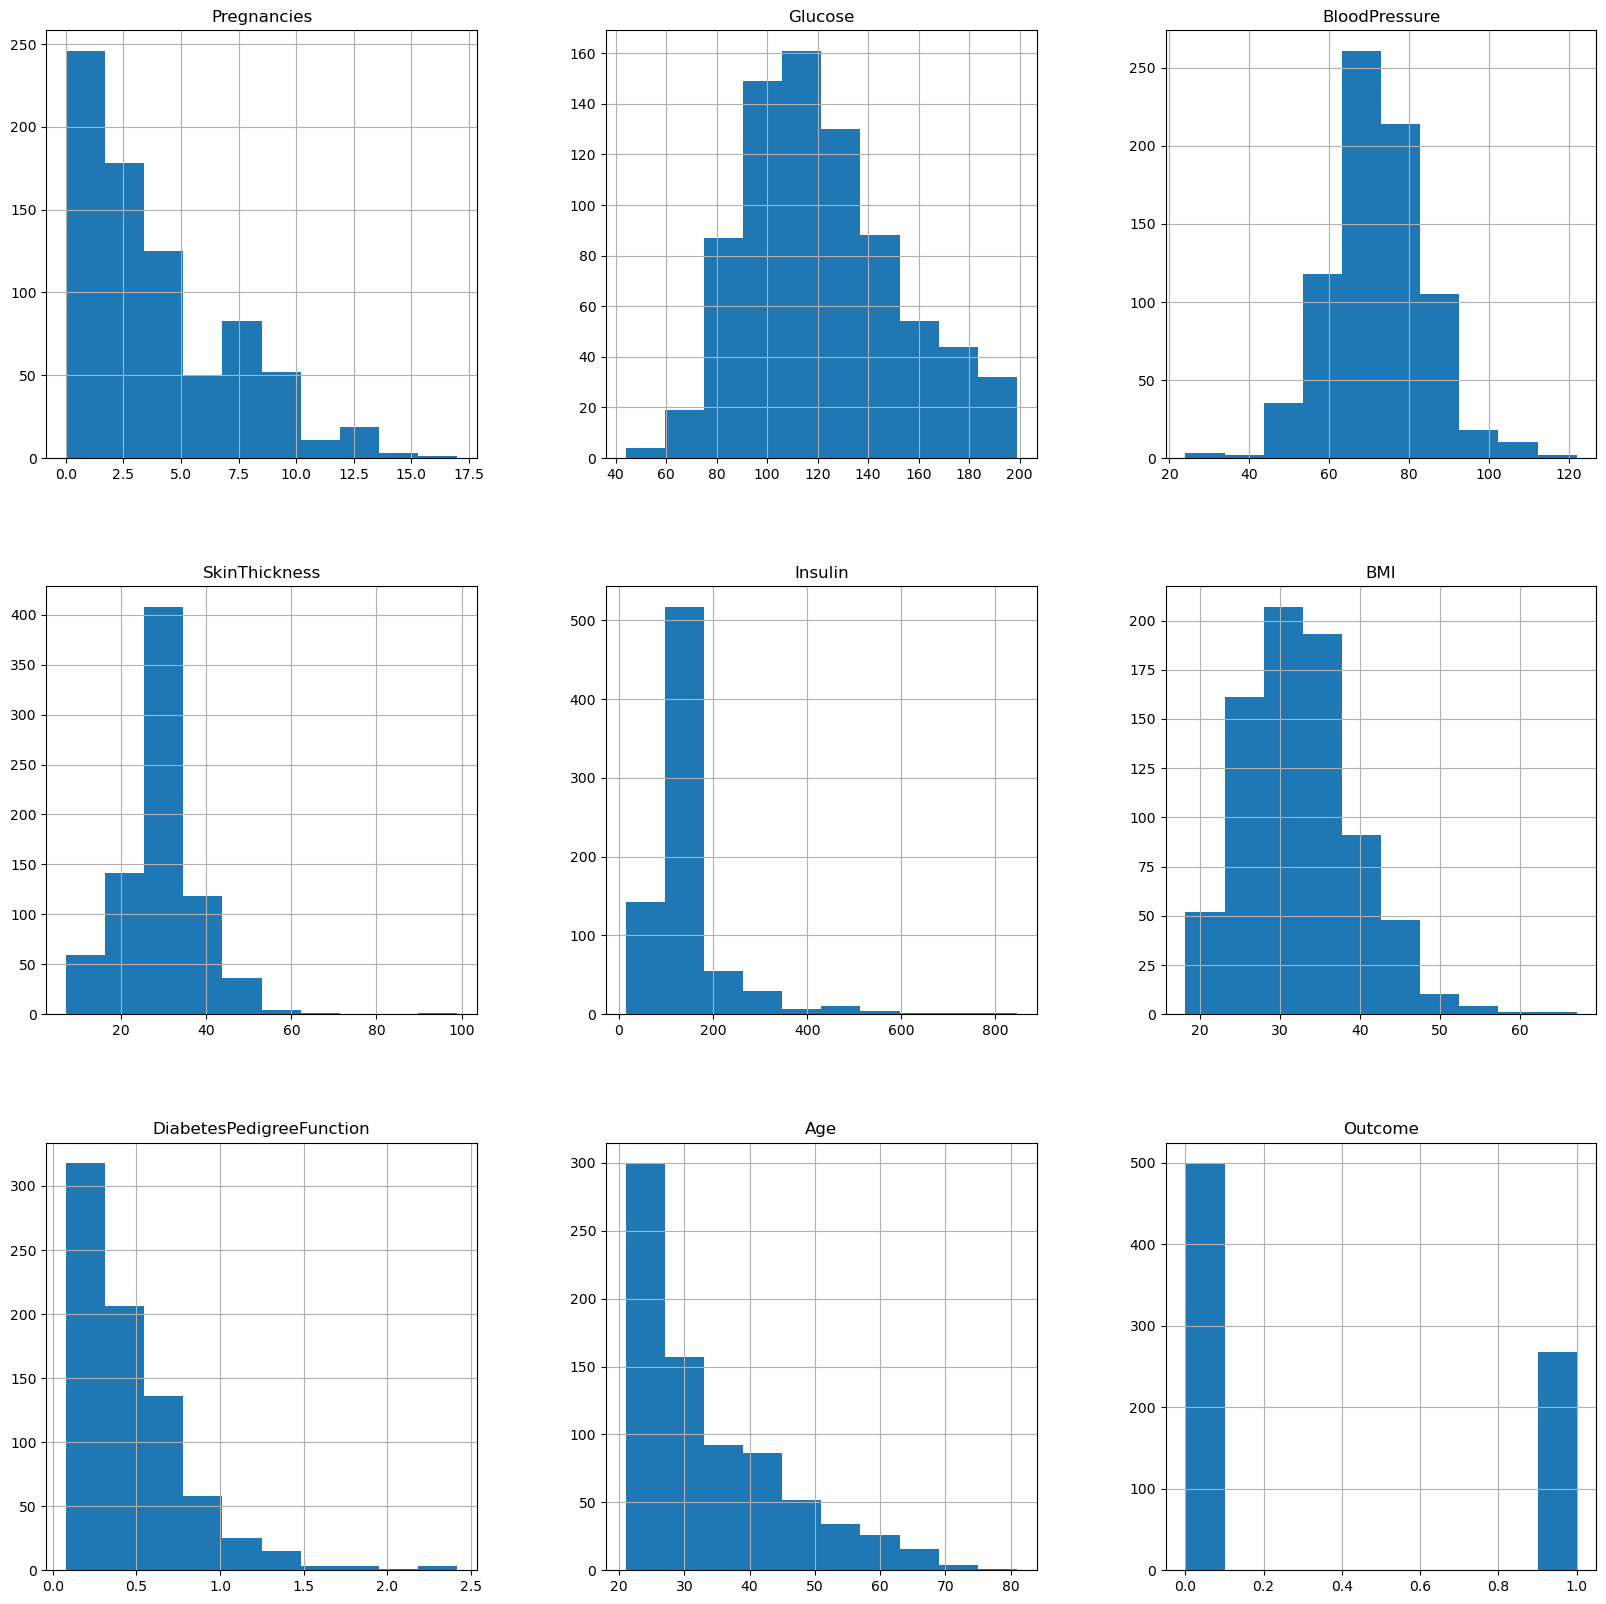

In [15]:
#Visualizing features with histographs
p = df2.hist(figsize = (20,20))

<AxesSubplot:xlabel='Outcome', ylabel='count'>

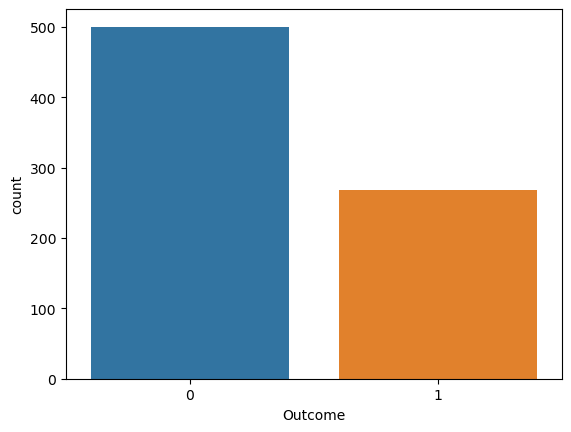

In [16]:
#Countplot of outcome
sns.countplot(x='Outcome', data= df)

In [17]:
#Splittiing the dataset
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=6)

In [20]:
#Model 1 Random Forest
model1 = RandomForestClassifier(n_estimators=150)
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [21]:
rfmodel = model1.predict(X_train)  #building model
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfmodel)))

Accuracy_Score = 1.0


In [22]:
predictions = model1.predict(X_test) #Predicting the values
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7559055118110236


In [23]:
#Checking accuracy
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test,predictions))

[[141  31]
 [ 31  51]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       172
           1       0.62      0.62      0.62        82

    accuracy                           0.76       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.76      0.76      0.76       254



In [24]:
#Model 2: Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
predictions2 = dtree.predict(X_test)  #Creating model and predicting values
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions2)))

Accuracy Score = 0.7362204724409449


In [26]:
#Checking accuracy of model
print(confusion_matrix(y_test, predictions2)) 
print(classification_report(y_test,predictions2))

[[136  36]
 [ 31  51]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       172
           1       0.59      0.62      0.60        82

    accuracy                           0.74       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.74      0.74      0.74       254



In [27]:
#Model 3: Support vector classifier
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [28]:
svc_pred = svc_model.predict(X_test)  #Predicting the values
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7440944881889764


In [29]:
#Finding accuracy of the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[148  24]
 [ 41  41]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       172
           1       0.63      0.50      0.56        82

    accuracy                           0.74       254
   macro avg       0.71      0.68      0.69       254
weighted avg       0.73      0.74      0.74       254



In [30]:
#Testin most accurate model i.e, random forest
model1.predict([[1,85.0,66.0,29.0,125.0,26.6,0.351,31]]) #The 2nd patient

C:\Users\Ramesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [31]:
model1.predict([[0, 185.6, 75, 52, 190, 31.8, 0.452, 52]])

C:\Users\Ramesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)